In [83]:
import pandas as pd
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
df = pd.read_csv('Bank-Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
df.shape

(10000, 14)

In [48]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [49]:

       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [50]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})


In [51]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [52]:
input = df.drop(['Surname', 'RowNumber', 'CustomerId', 'Exited'], axis=1)


In [53]:
input.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [54]:
cols_to_scale = ['CreditScore','Balance','EstimatedSalary']

In [55]:
scaler = MinMaxScaler()
input[cols_to_scale] = scaler.fit_transform(input[cols_to_scale])

In [57]:
input.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,1,42,2,0.000000,1,1,1,0.506735
1,0.516,2,1,41,1,0.334031,1,0,1,0.562709
2,0.304,0,1,42,8,0.636357,3,1,0,0.569654
3,0.698,0,1,39,1,0.000000,2,0,0,0.469120
4,1.000,2,1,43,2,0.500246,1,1,1,0.395400


In [ ]:
target = df['Exited']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=0.2,random_state=5)
X_train.shape

(8000, 10)

In [66]:
model = keras.Sequential(
    [
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

    ]
)

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8266 - loss: 0.4240
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8279 - loss: 0.4141
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.4187
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.4172
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.4190
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4133
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8336 - loss: 0.4100
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.4233
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8286 - loss: 0.4190
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.4166
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8305 - loss: 0.4082
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [72]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.3723 


[0.36873096227645874, 0.8450000286102295]

In [74]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [77]:
prediction = []
for element in yp:
    if element > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Text(95.72222222222221, 0.5, 'Truth')

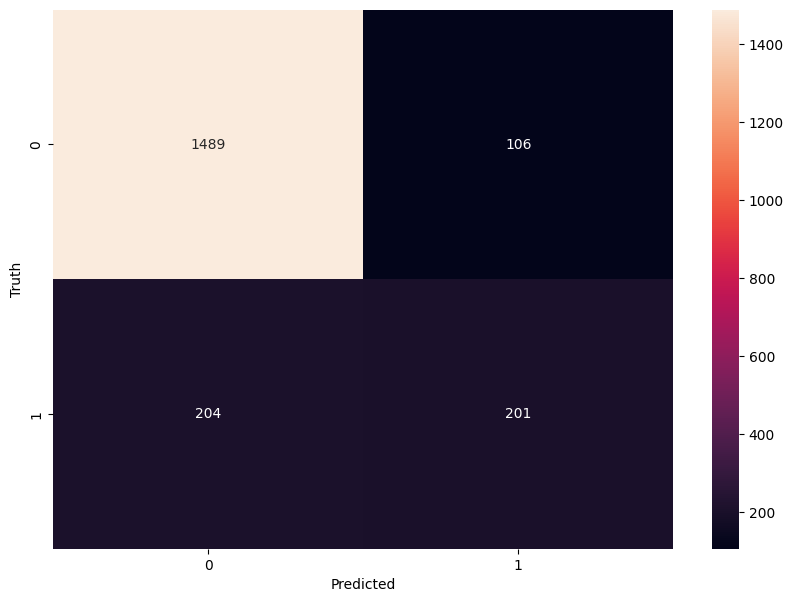

In [82]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1595
           1       0.65      0.50      0.56       405

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.74      2000
weighted avg       0.83      0.84      0.84      2000

